In [1]:
#this code segment shows how to use the parser
#TODO: 
import os
import __future__
import numpy as np
import log_parser
import namespace
import log_parser_namespace
import youtubebb_converter
import metric_map
import predictor
import utils

import numpy as np
import pandas as pd
import glob
import cv2

reload(namespace)
reload(log_parser)
reload(log_parser_namespace)

from matplotlib import pyplot as plt

%matplotlib inline

def plot_bbox(rgb_img, pred_item):
    
    _, cid, score, xmin, ymin, xmax, ymax = pred_item
    cname = namespace.CLASS_INDEX[cid]
    
    scale = np.array(rgb_img.shape[1::-1]+rgb_img.shape[1::-1])#[1::-1])
    label_name = cname
    display_txt = '%s: %.2f'%(label_name, score)
    detection = np.array([xmin, ymin, xmax, ymax])
    pt = detection * scale#(detection*scale).cpu().numpy()
    coords = (pt[0], pt[1]), pt[2]-pt[0]+1, pt[3]-pt[1]+1
    
    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
    color = colors[0]

    plt.imshow(rgb_img)
    
    if len(pred_item) > 0:
        currentAxis = plt.gca()
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
    plt.axis('off')
    plt.figure()

In [2]:
Parser = log_parser.LogParser()
vidinfo_dict = Parser.load_metainfo_dict()
YConverter = youtubebb_converter.YoutubeBBConverter(vidinfo_dict)
mAP = metric_map.mAP()
Pred  = predictor.Predictor()

ssd/ssd.py:34: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  self.priors = Variable(self.priorbox.forward(), volatile=True)


Loading weights into state dict...
Finished!


In [3]:
yanno, yanno_dict = YConverter.load_annotation(namespace.FILEPATH_YOUTUBE_YANNODICT)

df = pd.DataFrame.from_csv('./data/YOUTUBE_data/yt_bb_detection_train.csv', header=None)
df1 = pd.read_pickle('./data/YOUTUBE_data/yt_bb_detection_train_filtered.pkl.gz', compression='gzip')
                            #./data/YOUTUBE_data/yt_bb_detection_train_filtered.csv
    


/home/u9167/.conda/envs/env_torch/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:

vidpath = '/home/u9167/content_aware/data/YOUTUBE_data/videos/1/PKZXF6Hj0kw+1+0.mp4'
dirpath = '/home/u9167/content_aware/data/YOUTUBE_data/videos/1/PKZXF6Hj0kw+1+0/frames_x1080_b1024k'

vidpath = '/home/u9167/content_aware/data/YOUTUBE_data/videos/10/8q0FNaWFBjw+10+2.mp4'
dirpath = '/home/u9167/content_aware/data/YOUTUBE_data/videos/10/8q0FNaWFBjw+10+2/frames_x1080_b1024k'

vidpath = '/home/u9167/content_aware/data/YOUTUBE_data/videos/19/NJEg3tQ3M4Q+19+0.mp4'
dirpath = '/home/u9167/content_aware/data/YOUTUBE_data/videos/19/NJEg3tQ3M4Q+19+0/frames_x1080_b1024k'

vidpath = '/home/u9167/content_aware/data/YOUTUBE_data/videos/15/3zcr2YpUk1M+15+0.mp4'
dirpath = '/home/u9167/content_aware/data/YOUTUBE_data/videos/15/3zcr2YpUk1M+15+0/frames_x1080_b1024k'


vidpath = '/home/u9167/content_aware/data/YOUTUBE_data/videos/7/3ntdcikbOcE+7+0.mp4'
dirpath = '/home/u9167/content_aware/data/YOUTUBE_data/videos/7/3ntdcikbOcE+7+0/frames_x1080_b1024k'

vidpath = '/home/u9167/content_aware/data/YOUTUBE_data/videos/23/ZMdAlm9Zx_A+23+1.mp4'
dirpath = '/home/u9167/content_aware/data/YOUTUBE_data/videos/23/ZMdAlm9Zx_A+23+1/frames_x1080_b1024k'

#4 is not ready
#vidpath = '/home/u9167/content_aware/data/YOUTUBE_data/videos/4/349nzfNP4n8+4+0.mp4'
#dirpath = '/home/u9167/content_aware/data/YOUTUBE_data/videos/4/349nzfNP4n8+4+0/frames_x1080_b1024k'


filepath_list = glob.glob(dirpath + '/' + '*.jpg')
idx = 2
filepath1 = filepath_list[idx]
filepath0 = filepath_list[idx-1]
filepath2 = filepath_list[idx+1]
filepath = filepath1

In [5]:
dtoken, ftoken = utils.get_dirtoken_from_vidpath(vidpath), utils.get_filetoken_from_imgpath(vidpath, filepath)
print dtoken, ftoken
gt_list = yanno_dict[dtoken][ftoken]
print dtoken, ftoken, gt_list[0]

ZMdAlm9Zx_A+5+1 ZMdAlm9Zx_A+5+1+3
ZMdAlm9Zx_A+5+1 ZMdAlm9Zx_A+5+1+3 (0.0, 5, 1.0, 0.171, 0.083333336, 0.929, 0.665)


(0.0, 5, 1.0, 0.171, 0.083333336, 0.929, 0.665)


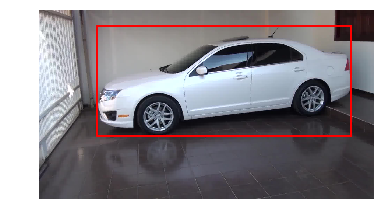

<Figure size 432x288 with 0 Axes>

In [6]:
img0, img1, img2 = cv2.imread(filepath0, cv2.IMREAD_COLOR), cv2.imread(filepath1, cv2.IMREAD_COLOR), cv2.imread(filepath2, cv2.IMREAD_COLOR)
rgb_img0, rgb_img1, rgb_img2 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB), cv2.cvtColor(img1, cv2.COLOR_BGR2RGB), cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

print gt_list[0]
plot_bbox(rgb_img1, gt_list[0])

In [ ]:
Their model: image --> SSD --> box, id
Our model: image --> OUR_MODEL --> perforamnce of SSD

In [ ]:
verified: 15, 1, 10, 19